<a href="https://colab.research.google.com/github/teecha/GoogleColab/blob/main/dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import collections
!pip install spacy_langdetect
!pip install iso-639
from spacy_langdetect import LanguageDetector

     |████████████████████████████████| 167 kB 4.3 MB/s 
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=169061 sha256=aba59bf01877907e4a79d5524dc20fc5b9c201f113e214a3e39429f9d30a9a5e
  Stored in directory: /root/.cache/pip/wheels/47/60/19/6d020fc92138ed1b113a18271e83ea4b5525fe770cb45b9a2e
Successfully built iso-639


In [3]:
# spacy language detection model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

In [4]:
text = ["L'entreprise la plus difficile sans doute, je l'avoue, est celle qui\
a pour objet d'arracher aux vils esclaves de l'habitude et des vieux\
préjugés érigés en opinion dominante, des coutumes bizarres qu'une\
longue succession de siècles a consacrées, mais comme l'expérience nous\
a pleinement démontré que l'ignorance et une aveugle jalousie opéraient\
chez les hommes la variabilité des idées, je veux m'écrier avec Mahomet\
et Voltaire:",
         "S'il vous fallait d'autres autorités pour vous convaincre que les\
premiers humains firent usage du PET, bien longtems avant qu'ils se\
servissent de la parole, j'invoquerais celle du savant Aristophanes,\
qui, dans sa comédie _des Grenouilles_, dit que les hommes, dans les\
premiers siècles d'une ignorance absolue, ne savaient faire autre chose\
que _péter_ au nez de leurs concitoyens et faire même encore plus,\
c'est-à-dire, pour parler plus proprement,",
         "All Koreans pay great honour to their dead parents, and tablets to\
their memory are placed in some room set apart for the purpose. Before\
these tablets sacrifices are offered. Yung Pak's father would have been\
almost overwhelmed with terror at thought of having no one to worship\
his memory and present offerings before his tablet.",
         "But Yung Pak's tiger was ferocious only in looks. It was made of paper\
pulp and painted with bright stripes. This harmless image of a fierce\
beast Yung Pak would pull about the floor with a string by the hour.",
         "As Yung Pak grew older he was allowed to play with other boys of his own\
age. A favourite sport was Hunting the Ring. In this game the boys would\
get together quite a large heap of sand. In this sand one of them would\
hide a ring, and then the urchins would all get slender sticks and poke\
around in the pile trying to find the ring. Whoever succeeded in getting\
the ring on his stick won the game, and carried the prize home as a sign\
of victory.",
         "The house in which Yung Pak lived was a very fine one, although the\
grounds were not as spacious as those of many houses in the outskirts of\
the city. But its walls were of stone, whereas many of the houses of\
Seoul had walls of paper.",
         "Nous donnâmes le signal du départ à nos chameliers. Avant de quitter la\
rive du Nil, mon frère et moi, nous bûmes dans le creux de la main une\
dernière gorgée de son eau bienfaisante, en faisant le voeu de nous\
désaltérer un jour à ses sources mystérieuses, et nous nous éloignâmes\
de Kéneh, en Égypte, le 25 décembre 1837, pour nous engager dans le\
désert.",
         "L'agent français, ayant été mandé, dit au Bey qu'il ne pouvait autoriser\
la bastonnade. Heussein Bey allégua que nous étions munis d'un firman du\
vice-roi, et que si le gouvernement français était trop bénin envers ses\
sujets Maugrebins, il n'entendait point agir de même. Nous intervînmes\
aussi, mais nous ne pûmes obtenir que la diminution d'une moitié de la\
peine.\
",
         "Reeds in een vorig werk hebben wij van Sonora gesproken [1], doch daar\
de geschiedenis die wij thans voornemens zijn te vertellen geheel en al\
in deze afgelegen provincie van Mexico voorvalt, zullen wij hier de\
beschrijving voltooien die wij toen slechts als ter loops hebben\
aangestipt.",
         "De overige zijn inderdaad slechts buitenhavens of opene reeden, waar de\
zeevaarders ongaarne eene schuilplaats zoeken, inzonderheid wanneer de\
geduchte cordonazo uit het zuidwesten buldert en de golf van Californië\
onstuimig in beweging zet.",
         "И думи на думите грозни в ответ\
                  се царю в сърце отзоваха:\
          Излез! Посрещни ги! - Или смелостта\
                  се смръзна в душата ти плаха?...\
          Той стана, възлезе на ближния хълм;\
                  след него войводи вървяха.",
         "Velice se potěšiv, že všechno jde dobře, pan Goljadkin\
postavil zrcádko na staré místo a sám přes to, že byl bos a\
měl dosud na sobě ten oblek, ve kterém obyčejně chodíval\
spat, přistoupil k oknu a s velikým účastenstvím počal očima\
cosi vyhledávati na dvoře domu, na který vedla okna jeho\
příbytku. Patrně i to, co vyhledal na dvoře, úplně ho\
uspokojilo; tvář jeho zazářila spokojeným úsměvem.",
         "Balíček zelených, šedých, modrých, červených a různých\
pestrých bankovek bezpochyby také velmi přívětivě a\
pochvalně vzhlédl na pana Goljadkina: s vyjasněným obličejem\
položil před sebe na stůl otevřenou peněženku a hbitě si\
počal mnouti ruce na znamení nejvyšší spokojenosti. Konečně\
vytáhl původce své radosti, balíček státních assignací, a\
počítaje je od včerejška už po sté, počal je\
přepočítávati, starostlivě rozetíraje každý lístek mezi\
palcem a ukazováčkem."]

In [5]:
# Removing punctuation from the text
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~`’'''
for i in range(0,len(text)): 
  for ele in text[i]:
      if ele in punc:
          text[i] = text[i].replace(ele, "")

In [8]:
# Language detection with probability
from iso639 import languages
lang = []
names = []
for texts in text:
  doc = nlp(texts)
  lang.append(doc._.language)
  language_name = languages.get(alpha2=doc._.language['language'])
  names.append(language_name.name)
  print(doc._.language)

print(names)

{'language': 'fr', 'score': 0.9999958751283833}
{'language': 'fr', 'score': 0.9999970944141664}
{'language': 'en', 'score': 0.9999971335362776}
{'language': 'en', 'score': 0.9999979562514734}
{'language': 'en', 'score': 0.9999978844693262}
{'language': 'en', 'score': 0.9999960164525337}
{'language': 'fr', 'score': 0.9999972410964836}
{'language': 'fr', 'score': 0.9999963539965927}
{'language': 'nl', 'score': 0.9999986450183875}
{'language': 'nl', 'score': 0.9999988071153094}
{'language': 'bg', 'score': 0.9999951385098321}
{'language': 'cs', 'score': 0.9999966034411062}
{'language': 'cs', 'score': 0.9999990965922089}
['French', 'French', 'English', 'English', 'English', 'English', 'French', 'French', 'Dutch', 'Dutch', 'Bulgarian', 'Czech', 'Czech']


In [9]:
# Removing stop words for preprosessing data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
print(collections.Counter(text[0]).most_common(5)[0])

(' ', 59)


[('Lentreprise', 1), ('plus', 1), ('difficile', 1), ('sans', 1), ('doute', 1), ('lavoue', 1), ('celle', 1), ('quia', 1), ('objet', 1), ('darracher', 1)]


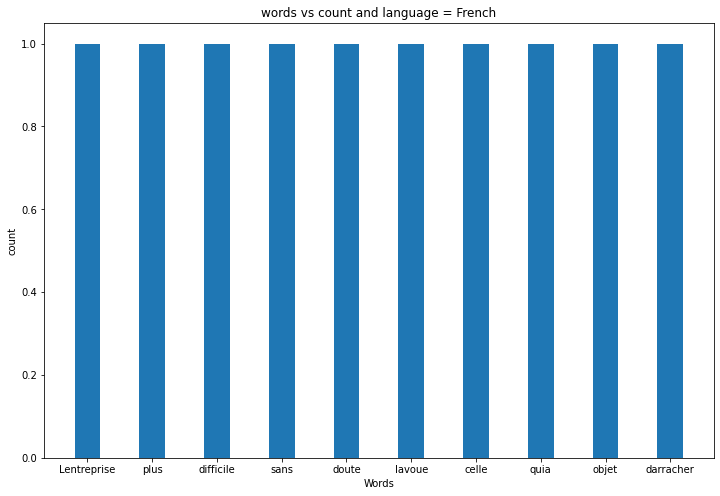

[('lespremiers', 2), ('faire', 2), ('Sil', 1), ('fallait', 1), ('dautres', 1), ('autorités', 1), ('convaincre', 1), ('humains', 1), ('firent', 1), ('usage', 1)]


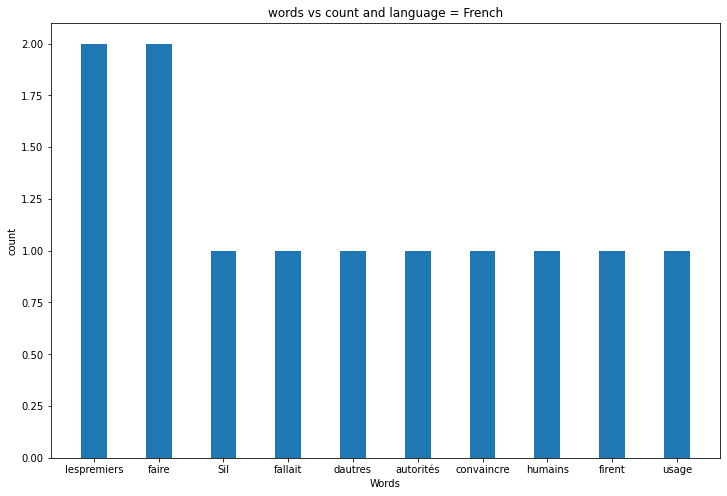

[('tablets', 2), ('memory', 2), ('All', 1), ('Koreans', 1), ('pay', 1), ('great', 1), ('honour', 1), ('dead', 1), ('parents', 1), ('totheir', 1)]


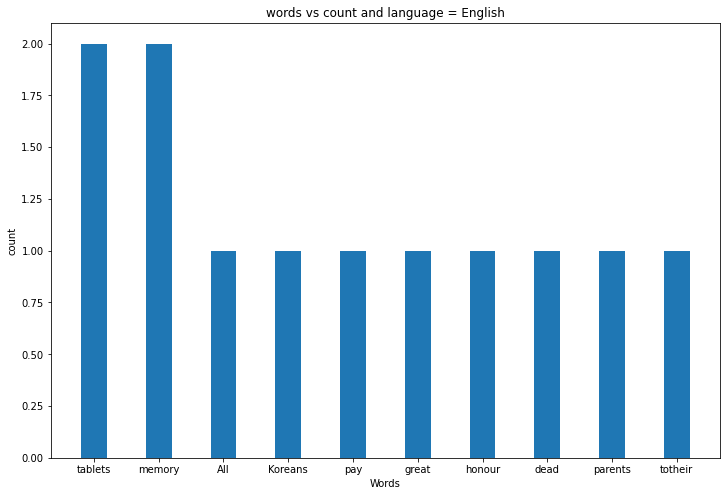

[('Yung', 2), ('But', 1), ('Paks', 1), ('tiger', 1), ('ferocious', 1), ('looks', 1), ('It', 1), ('made', 1), ('paperpulp', 1), ('painted', 1)]


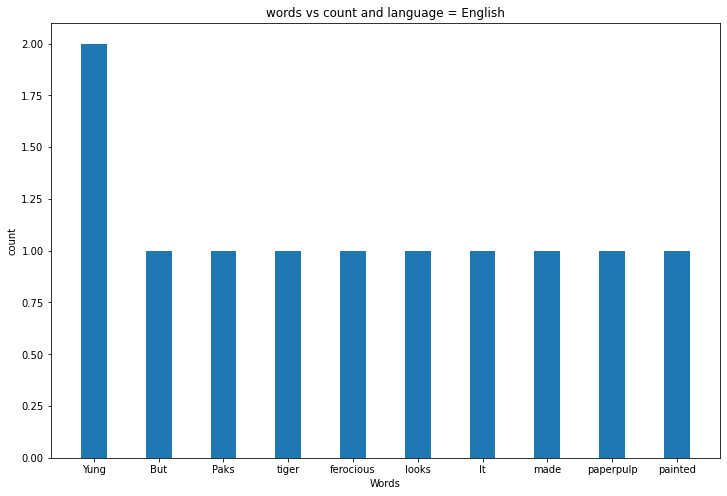

[('ring', 3), ('boys', 2), ('In', 2), ('game', 2), ('sand', 2), ('As', 1), ('Yung', 1), ('Pak', 1), ('grew', 1), ('older', 1)]


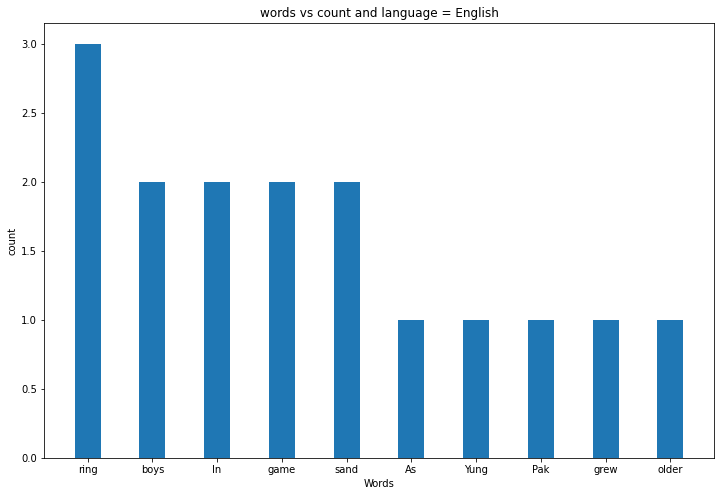

[('many', 2), ('houses', 2), ('walls', 2), ('The', 1), ('house', 1), ('Yung', 1), ('Pak', 1), ('lived', 1), ('fine', 1), ('one', 1)]


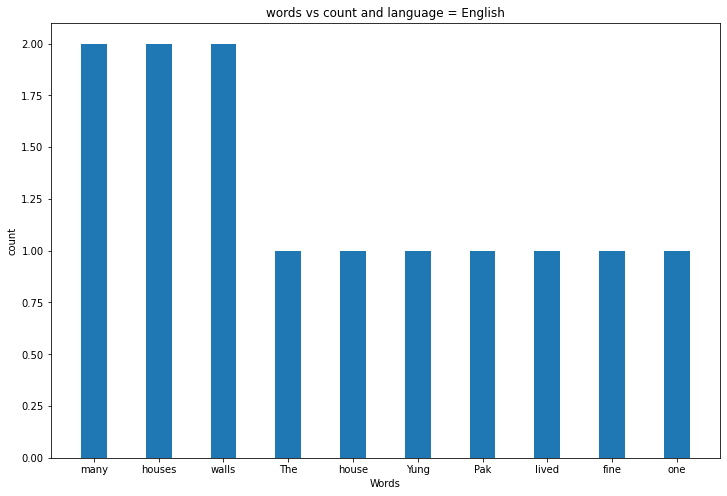

[('Nous', 1), ('donnâmes', 1), ('signal', 1), ('départ', 1), ('chameliers', 1), ('Avant', 1), ('quitter', 1), ('larive', 1), ('Nil', 1), ('frère', 1)]


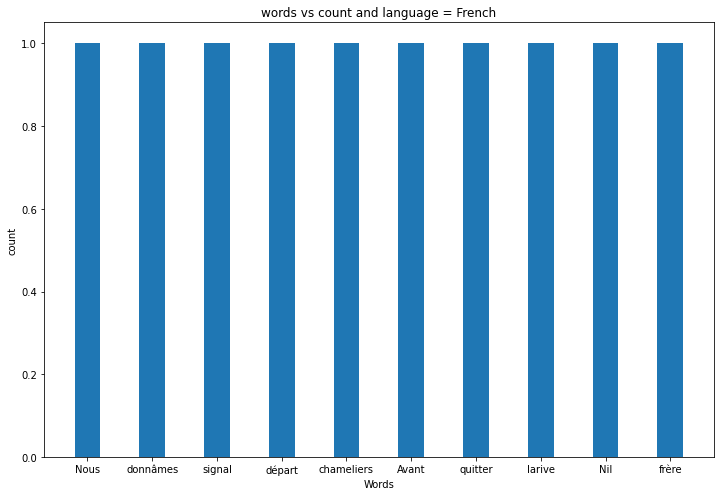

[('français', 2), ('Bey', 2), ('Lagent', 1), ('mandé', 1), ('dit', 1), ('quil', 1), ('pouvait', 1), ('autoriserla', 1), ('bastonnade', 1), ('Heussein', 1)]


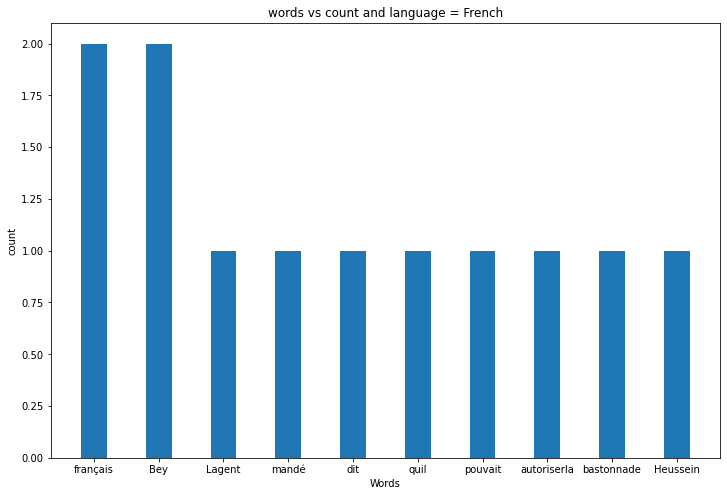

[('wij', 4), ('Reeds', 1), ('vorig', 1), ('werk', 1), ('Sonora', 1), ('gesproken', 1), ('1', 1), ('daarde', 1), ('geschiedenis', 1), ('thans', 1)]


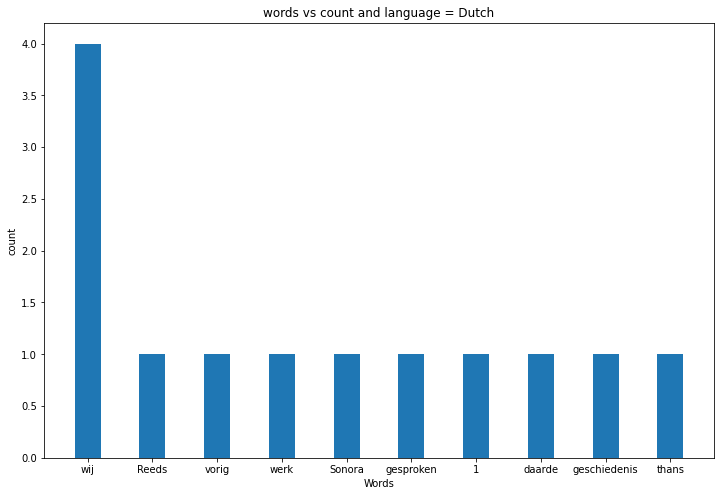

[('De', 1), ('overige', 1), ('inderdaad', 1), ('slechts', 1), ('buitenhavens', 1), ('opene', 1), ('reeden', 1), ('waar', 1), ('dezeevaarders', 1), ('ongaarne', 1)]


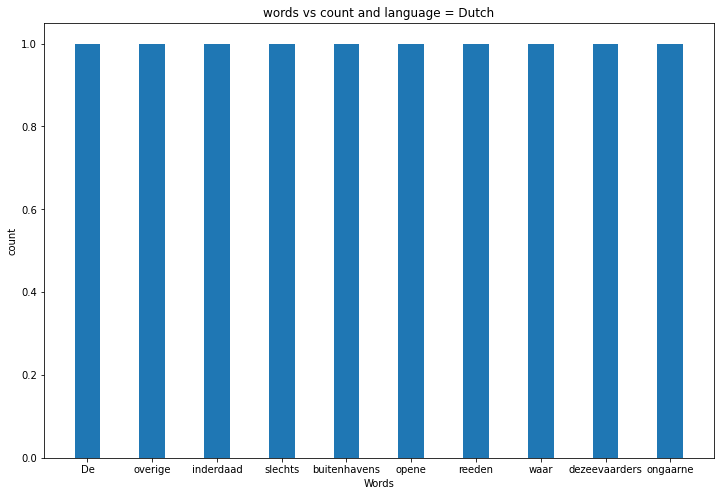

[('De', 1), ('overige', 1), ('inderdaad', 1), ('slechts', 1), ('buitenhavens', 1), ('opene', 1), ('reeden', 1), ('waar', 1), ('dezeevaarders', 1), ('ongaarne', 1)]


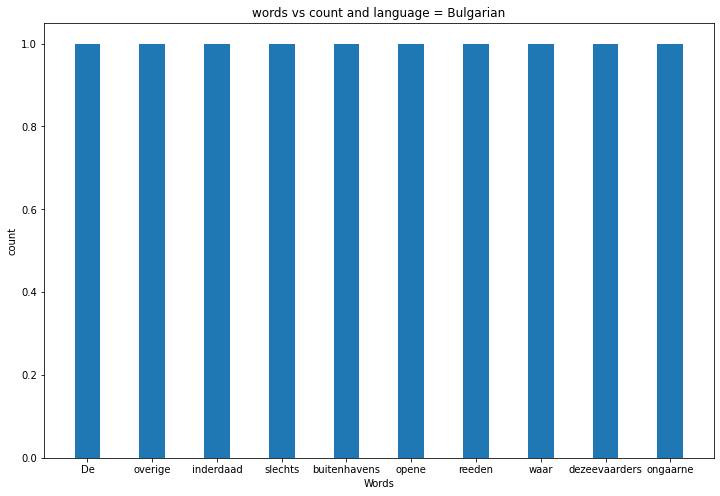

[('De', 1), ('overige', 1), ('inderdaad', 1), ('slechts', 1), ('buitenhavens', 1), ('opene', 1), ('reeden', 1), ('waar', 1), ('dezeevaarders', 1), ('ongaarne', 1)]


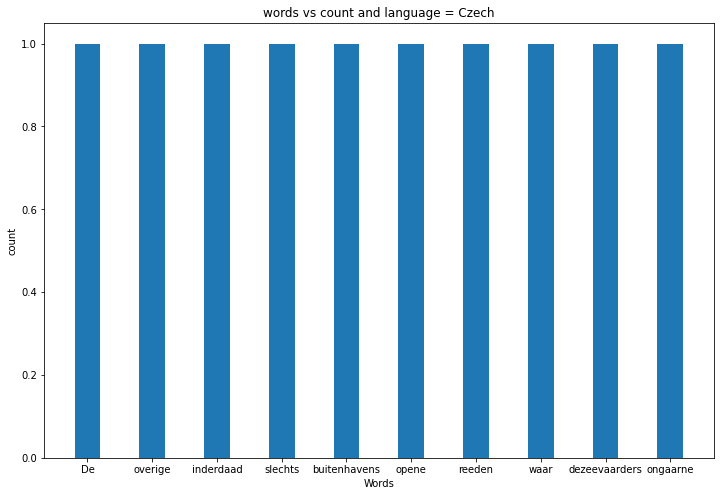

[('De', 1), ('overige', 1), ('inderdaad', 1), ('slechts', 1), ('buitenhavens', 1), ('opene', 1), ('reeden', 1), ('waar', 1), ('dezeevaarders', 1), ('ongaarne', 1)]


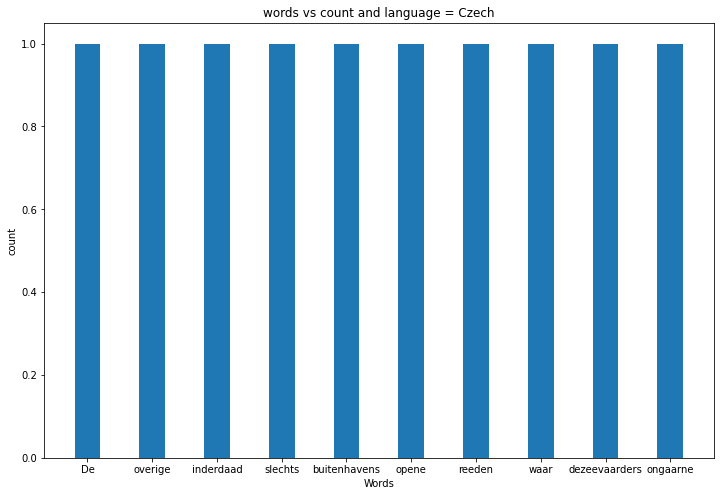

In [11]:
for i in range(0,len(text)):
  try:
    stopWords = set(stopwords.words(names[i].lower()))
    words = word_tokenize(text[i])
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
  except:
    pass
  from collections import Counter
  if wordsFiltered == []:
    splitting_text = text[i].split()
  else:  
    splitting_text = wordsFiltered
  Counter = Counter(splitting_text)
  most_common = Counter.most_common(10)
  print(most_common)
  xval = []
  yval = []
  plt.figure(figsize=(12,8))
  for j in most_common:
    xval.append(j[0])
    yval.append(j[1])
  plt.bar(xval,yval,width=0.4)
  plt.title('words vs count and language = {}'.format(names[i]))
  plt.xlabel('Words')
  plt.ylabel('count')
  plt.show()

In [12]:
# user input of text
text_by_user = input("Enter or paste the text to detect language  ")
doc = nlp(text_by_user)
language_name = languages.get(alpha2=doc._.language['language'])
prob_percent = round(doc._.language['score']*100)
print("The language detected is {} with a probalilty of {}%".format(language_name.name,prob_percent))

Enter or paste the text to detect language  lol
The language detected is Spanish with a probalilty of 100%
